In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
#Pairing cities with our random coordinates
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

601

In [6]:
#Let's use pseudocode to map out, at a high level, how we will get the weather data for each city for the website.
#We will need to do the following:

#1.Import our dependencies and initialize counters and an empty list that will hold the weather data.
#2. Loop through the cities list.
#3. Group the cities in sets of 50 to log the process as we find the weather data for each city.
#    *Two counters will be needed here: one to log the city count from 1 to 50, and another for the sets.
#4. Build the city_url or endpoint for each city.
#5. Log the URL and the record and set numbers.
#6. Make an API request for each city.
#7. Parse the JSON weather data for the following:
#     *City, country, and date
#     *Latitude and longitude
#     *Maximum temperature
#     *Humidity
#     *Cloudiness
#     *Wind speed
#8. Add the data to a list in a dictionary format and then convert the list to a DataFrame.

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=21ca717d3791ec5c7c50819b748221c4


In [8]:
#1. Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
#2. Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters. (In the code block, we have initialized the counters at 1 because we want the first iteration of the logging for each recorded response and the set to start at 1.)
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [10]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.(endpart is formatting)
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

Processing Record 1 of Set 1 | sentyabrskiy
Processing Record 2 of Set 1 | port alfred
Processing Record 3 of Set 1 | ponta do sol
Processing Record 4 of Set 1 | bluff
Processing Record 5 of Set 1 | yichang
Processing Record 6 of Set 1 | halalo
Processing Record 7 of Set 1 | bodo
Processing Record 8 of Set 1 | guerrero negro
Processing Record 9 of Set 1 | villablino
Processing Record 10 of Set 1 | hobart
Processing Record 11 of Set 1 | tuktoyaktuk
Processing Record 12 of Set 1 | port hueneme
Processing Record 13 of Set 1 | vardo
Processing Record 14 of Set 1 | surt
Processing Record 15 of Set 1 | mys shmidta
Processing Record 16 of Set 1 | oranjestad
Processing Record 17 of Set 1 | rovaniemi
Processing Record 18 of Set 1 | kaitangata
Processing Record 19 of Set 1 | barentsburg
Processing Record 20 of Set 1 | bur gabo
Processing Record 21 of Set 1 | milingimbi
Processing Record 22 of Set 1 | thompson
Processing Record 23 of Set 1 | punta arenas
Processing Record 24 of Set 1 | portland
P

In [14]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.(endpart is formatting)
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 2 of Set 25 | sentyabrskiy
City not found. Skipping...
Processing Record 3 of Set 25 | port alfred
Processing Record 4 of Set 25 | ponta do sol
Processing Record 5 of Set 25 | bluff
Processing Record 6 of Set 25 | yichang
Processing Record 7 of Set 25 | halalo
City not found. Skipping...
Processing Record 8 of Set 25 | bodo
Processing Record 9 of Set 25 | guerrero negro
Processing Record 10 of Set 25 | villablino
Processing Record 11 of Set 25 | hobart
Processing Record 12 of Set 25 | tuktoyaktuk
Processing Record 13 of Set 25 | port hueneme
Processing Record 14 of Set 25 | vardo
Processing Record 15 of Set 25 | surt
Processing Record 16 of Set 25 | mys shmidta
City not found. Skipping...
Processing Record 17 of Set 25 | oranjestad
Processing Record 18 of Set 25 | rovaniemi
Processing Record 19 of Set 25 | kaitangata
Processing Record 20 of Set 25 | barentsburg
City not found. Skipping...
Processing Record 21 of Set 25 | bur gabo
City not found. Skipping...
Processing

In [15]:
len(city_data)

543

In [18]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kisangani,0.5167,25.2000,70.84,85,32,2.59,CD,2021-07-14 00:55:32
1,Port Alfred,-33.5906,26.8910,50.45,70,65,19.80,ZA,2021-07-14 01:03:33
2,Ponta Do Sol,32.6667,-17.1000,70.72,79,0,5.99,PT,2021-07-14 01:03:33
3,Bluff,-46.6000,168.3333,49.98,70,100,17.22,NZ,2021-07-14 01:03:33
4,Yichang,30.7144,111.2847,90.32,63,0,1.95,CN,2021-07-14 01:03:34
5,Bodo,67.2800,14.4050,54.77,92,90,5.75,NO,2021-07-14 01:03:34
6,Guerrero Negro,27.9769,-114.0611,75.60,64,15,15.23,MX,2021-07-14 01:03:34
7,Villablino,42.9393,-6.3194,53.19,98,45,3.40,ES,2021-07-14 01:03:35
8,Hobart,-42.8794,147.3294,51.12,92,75,1.01,AU,2021-07-14 01:01:08
9,Tuktoyaktuk,69.4541,-133.0374,42.17,79,100,11.95,CA,2021-07-14 01:03:35


In [25]:
new_column_order = ["City", "Country","Date","Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [28]:
city_data_df = city_data_df[new_column_order] 
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kisangani,CD,2021-07-14 00:55:32,0.5167,25.2000,70.84,85,32,2.59
1,Port Alfred,ZA,2021-07-14 01:03:33,-33.5906,26.8910,50.45,70,65,19.80
2,Ponta Do Sol,PT,2021-07-14 01:03:33,32.6667,-17.1000,70.72,79,0,5.99
3,Bluff,NZ,2021-07-14 01:03:33,-46.6000,168.3333,49.98,70,100,17.22
4,Yichang,CN,2021-07-14 01:03:34,30.7144,111.2847,90.32,63,0,1.95
...,...,...,...,...,...,...,...,...,...
538,Show Low,US,2021-07-14 01:06:19,34.2542,-110.0298,82.11,41,1,11.50
539,Naryan-Mar,RU,2021-07-14 01:06:19,67.6713,53.0870,54.50,58,99,7.45
540,Cabedelo,BR,2021-07-14 01:06:19,-6.9811,-34.8339,74.07,84,80,12.08
541,Ifanadiana,MG,2021-07-14 01:06:19,-21.3000,47.6333,58.08,97,40,2.17


In [30]:
# Create the output file (CSV). [First Create a folder called weather_data in the World_Weather_Analysis folder]
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [31]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

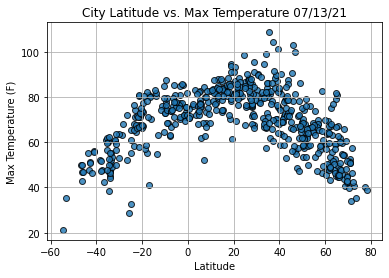

In [32]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

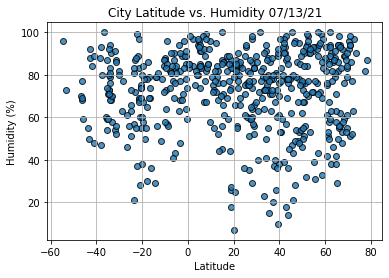

In [33]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

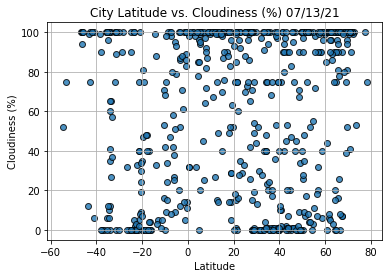

In [34]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

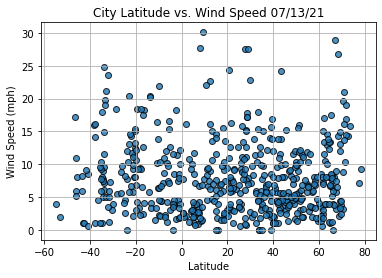

In [35]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()